In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from joblib import Parallel,delayed
from final_logistics import Spin_DDE_integrator, Boson_DDE_integrator, Boson_analyt, format_plot
from WW_logistics import Waveguide,evolve

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  



# 1. Benchmarking 


In [161]:
# Defining parameters. 
initial = '001100'
gamma_0 = 0.1 


phi_0_1 = 2* np. pi 
tau_0_1 = (np.pi / 20 ) / gamma_0
t_max_1 = 8 / gamma_0

phi_0_2 = 50* np. pi 
tau_0_2 = (5*np.pi / 4)/gamma_0
t_max_2 = 13.33 / gamma_0

## 1.1 Two level systems  

In [4]:
# DDE Highly markovian  
w1 = Spin_DDE_integrator(gamma=gamma_0,phi=phi_0_1,tau=tau_0_1,initial_state=initial,N_steps=50) # not a super small dt 
w1.evolve(t_max_1)
data_1 = w1.excited_state()
t_1 = data_1[0]

In [5]:
# WW highly markovian 
Delta = phi_0_1 / tau_0_1

N_emitters = len(initial)
positions = np.arange(0, N_emitters) * phi_0_1 / Delta


problem = Waveguide(
    Delta=Delta, positions=positions, gamma=gamma_0, model="ring", excitations=2
)
t_max = problem.T / 5
observables = [problem.qubit_P1(n) for n in range(0, N_emitters)]
t, vt = evolve(
    problem.Hamiltonian(),
    problem.qubit_state("001100"),
    steps=200,
    T=t_max,
    callback=lambda t, v: [np.vdot(v, O @ v) for O in observables],
)
data_exact_1 = [np.abs(vt[:, n]) for n in range(0, N_emitters)]
data_exact_1.insert(0, t)

In [6]:
# DDE Non-Markovian 
w2 = Spin_DDE_integrator(gamma=gamma_0,phi=phi_0_2,tau=tau_0_2,initial_state=initial)
w2.evolve(t_max_2)
data_2 = w2.excited_state()
t_2 = data_2[0]

In [7]:
# WW Non-Markovian 

Delta = phi_0_2 / tau_0_2

N_emitters = len(initial)
positions = np.arange(0, N_emitters) * phi_0_2 / Delta


problem = Waveguide(
    Delta=Delta, positions=positions, gamma=gamma_0, model="ring", excitations=2
)
t_max = problem.T / 3  
observables = [problem.qubit_P1(n) for n in range(0, N_emitters)]
t, vt = evolve(
    problem.Hamiltonian(),
    problem.qubit_state("001100"),
    T=t_max,
    steps=200,
    callback=lambda t, v: [np.vdot(v, O @ v) for O in observables],
)
data_exact_2 = [np.abs(vt[:, n]) for n in range(0, N_emitters)]
data_exact_2.insert(0, t)


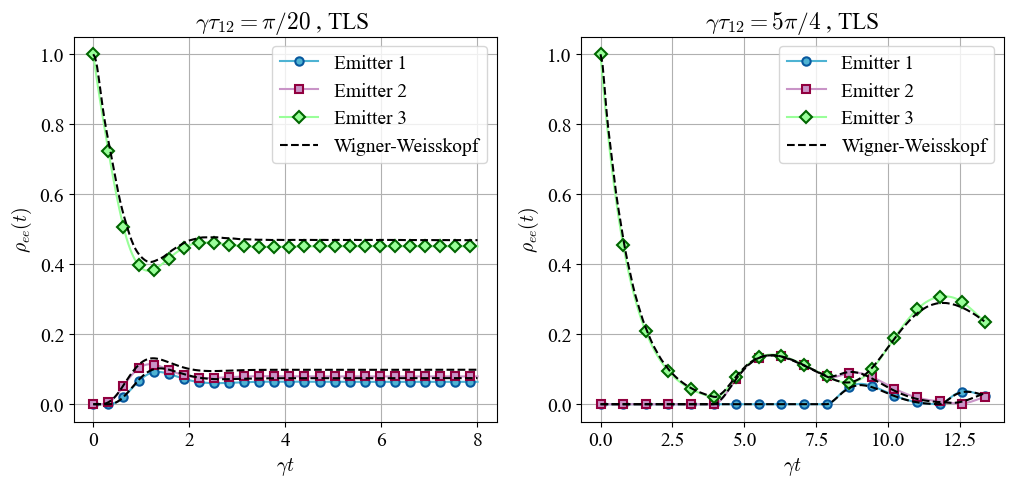

In [143]:
# Graph plotting. In order to keep it light, no 3D representation. 
fig,axs = plt.subplots(1,2,figsize = (12,5)) 


axs[0].set_title(r"$ \gamma \tau_{12} = \pi / 20  $ , TLS  ")
axs[0].plot(gamma_0*np.asarray(t_1),np.real(data_1[1]),label="Emitter 1 ",**format_plot(0,100))
axs[0].plot(gamma_0*np.asarray(t_1),np.real(data_1[2]),label="Emitter 2 ",**format_plot(1,100))
axs[0].plot(gamma_0*np.asarray(t_1),np.real(data_1[3]),label="Emitter 3 ",**format_plot(2,100))
axs[0].plot(gamma_0 * np.asarray(data_exact_1[0]), np.abs(data_exact_1[1]), "k--",label='Wigner-Weisskopf')
axs[0].plot(gamma_0 * np.asarray(data_exact_1[0]), np.abs(data_exact_1[2]), "k--")
axs[0].plot(gamma_0 * np.asarray(data_exact_1[0]), np.abs(data_exact_1[3]), "k--")
axs[0].set_xlabel(r"$\gamma t$")
axs[0].set_ylabel(r"$\rho_{ee}(t)$")


axs[0].grid()
axs[0].legend()

axs[1].set_title(r"$ \gamma \tau_{12} = 5 \pi / 4  $ , TLS ")
axs[1].plot(gamma_0*np.asarray(t_2),np.real(data_2[1]),label="Emitter 1 ",**format_plot(0,10))
axs[1].plot(gamma_0*np.asarray(t_2),np.real(data_2[2]),label="Emitter 2 ",**format_plot(1,10))
axs[1].plot(gamma_0*np.asarray(t_2),np.real(data_2[3]),label="Emitter 3 ",**format_plot(2,10))
axs[1].plot(gamma_0 * np.asarray(data_exact_2[0]), np.abs(data_exact_2[1]), "k--",label='Wigner-Weisskopf')
axs[1].plot(gamma_0 * np.asarray(data_exact_2[0]), np.abs(data_exact_2[2]), "k--")
axs[1].plot(gamma_0 * np.asarray(data_exact_2[0]), np.abs(data_exact_2[3]), "k--")
axs[1].set_xlabel(r"$\gamma t$")
axs[1].set_ylabel(r"$\rho_{ee}(t)$")

axs[1].grid()
axs[1].legend()

plt.show()

## 1.2 Cavities 

In [162]:
#DDE highly markovian 
w3 = Boson_DDE_integrator(gamma=gamma_0,phi=phi_0_1,tau=tau_0_1,initial_state=initial)
w3.evolve(t_max_1)
data_3 = w3.excited_state()
t_3 = np.asarray(data_3[0])

In [163]:
# DDE Non-MArkovian 
w4 = Boson_DDE_integrator(gamma=gamma_0,phi=phi_0_2,tau=tau_0_2,initial_state=initial)
w4.evolve(20/gamma_0)
data_4 = w4.excited_state()
t_4 = np.asarray(data_4[0])

In [164]:
# Analytical 
data_exact_3,_ = Boson_analyt(len(initial),initial,gamma_0,phi_0_1,tau_0_1,t_max_1,0.01)
t_3_exact = np.asarray(data_exact_3[0])

data_exact_4,_ = Boson_analyt(len(initial),initial,gamma_0,phi_0_2,tau_0_2,20/gamma_0,0.01)
t_4_exact = np.asarray(data_exact_4[0])

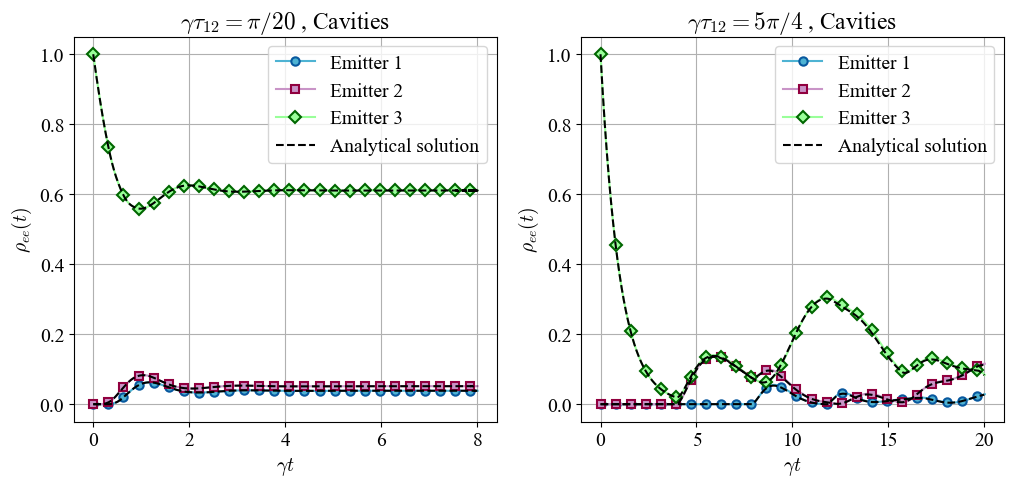

In [165]:
fig,axs = plt.subplots(1,2,figsize = (12,5)) 

axs[0].set_title(r"$ \gamma \tau_{12} = \pi / 20  $ , Cavities ")
axs[0].plot(gamma_0*t_3,np.real(data_3[1]),label="Emitter 1 ",**format_plot(0,100))
axs[0].plot(gamma_0*t_3,np.real(data_3[2]),label="Emitter 2 ",**format_plot(1,100))
axs[0].plot(gamma_0*t_3,np.real(data_3[3]),label="Emitter 3 ",**format_plot(2,100))
axs[0].plot(gamma_0*t_3_exact,np.real(data_exact_3[1]),'k--',label='Analytical solution')
axs[0].plot(gamma_0*t_3_exact,np.real(data_exact_3[2]),'k--')
axs[0].plot(gamma_0*t_3_exact,np.real(data_exact_3[3]),'k--')
axs[0].set_xlabel(r"$\gamma t $")
axs[0].set_ylabel(r"$\rho_{ee}(t) $")
axs[0].grid()
axs[0].legend()

axs[1].set_title(r"$ \gamma \tau_{12} = 5 \pi / 4  $ , Cavities ")
axs[1].plot(gamma_0*t_4,np.real(data_4[1]),label="Emitter 1 ",**format_plot(0,10))
axs[1].plot(gamma_0*t_4,np.real(data_4[2]),label="Emitter 2 ",**format_plot(1,10))
axs[1].plot(gamma_0*t_4,np.real(data_4[3]),label="Emitter 3 ",**format_plot(2,10))
axs[1].plot(gamma_0*t_4_exact,np.real(data_exact_4[1]),'k--',label='Analytical solution')
axs[1].plot(gamma_0*t_4_exact,np.real(data_exact_4[2]),'k--')
axs[1].plot(gamma_0*t_4_exact,np.real(data_exact_4[3]),'k--')
axs[1].set_xlabel(r"$\gamma t $")
axs[1].set_ylabel(r"$\rho_{ee}(t) $")
axs[1].grid()
axs[1].legend()

plt.show()


# 2. Time-delayed collective emission 

In [27]:
# defining parameters
gamma_0 = 0.1 

phi_0 =  2*np.pi 
tau_0 = (np.pi / 20 ) / gamma_0  # so that gamma tau = pi / 20 

initial_1 = '+++++++'
initial_2 = '+-+-+-+'
t_max = 5.1 * tau_0

## 2.1 Two level systems  

In [ ]:
# integration 
w1 = Spin_DDE_integrator(gamma=gamma_0,phi=phi_0,tau=tau_0,initial_state=initial_1)
w1.evolve(t_max)
data_s = w1.excited_state()
t = np.array(data_s[0])

In [ ]:
# change in initial state
w1.initial_state = initial_2
data_s_2 = w1.excited_state()

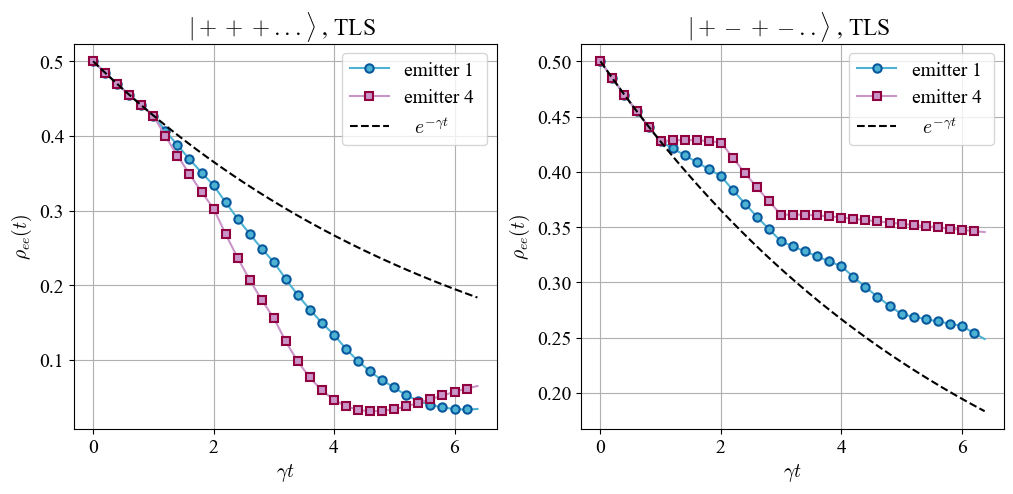

In [ ]:
# figure plot
fig,axs = plt.subplots(1,2,figsize = (12,5)) 
markev = 10 

axs[0].set_title(r"$ | + + +... \rangle  $ , TLS  ")
axs[0].plot(t/tau_0,np.real(data_s[1]),label="emitter 1 ",**format_plot(0,10))
axs[0].plot(t/tau_0,np.real(data_s[4]),label="emitter 4 ",**format_plot(1,10))
axs[0].plot(t/tau_0,0.5*np.exp(-1*t*gamma_0),'k--',label=r" $ ~ e^{-\gamma t} $ ")
axs[0].set_xlabel(r"$\gamma t$")
axs[0].set_ylabel(r"$\rho_{ee}(t)$")
axs[0].grid()
axs[0].legend()

axs[1].set_title(r"$ | + - + - .. \rangle  $ , TLS  ")
axs[1].plot(t/tau_0,np.real(data_s_2[1]),label="emitter 1 ",**format_plot(0,10))
axs[1].plot(t/tau_0,np.real(data_s_2[4]),label="emitter 4 ",**format_plot(1,10))
axs[1].plot(t/tau_0,0.5*np.exp(-t*gamma_0),'k--',label=r" $ ~ e^{-\gamma t} $ ")
axs[1].set_xlabel(r"$\gamma t$")
axs[1].set_ylabel(r"$\rho_{ee}(t)$")
axs[1].grid()
axs[1].legend()

plt.show()

## 2.2 Cavities 

In [ ]:
#integration 
w2 = Boson_DDE_integrator(gamma=gamma_0,phi=phi_0,tau=tau_0,initial_state=initial_1)
t_max = 25.1*tau_0
w2.evolve(t_max)
data_b = w2.excited_state()
t = data_b[0]

In [ ]:
# change in initial state 
w2.initial_state = initial_2
data_b_2 = w2.excited_state()

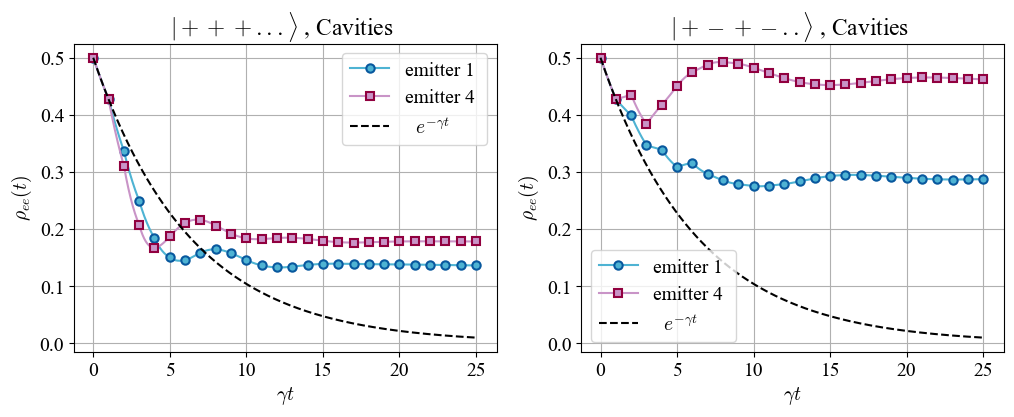

In [ ]:
# figure plot 
fig,axs = plt.subplots(1,2,figsize = (12,4)) 

axs[0].set_title(r"$ | + + +... \rangle  $ , Cavities  ")
axs[0].plot(t/tau_0,np.real(data_b[1]),label="emitter 1 ",**format_plot(0,50))
axs[0].plot(t/tau_0,np.real(data_b[4]),label="emitter 4 ",**format_plot(1,50))
axs[0].plot(t/tau_0,0.5*np.exp(-1*np.asarray((t*gamma_0))),'k--',label=r" $ ~ e^{-\gamma t} $ ")
axs[0].set_xlabel(r"$\gamma t$")
axs[0].set_ylabel(r"$\rho_{ee}(t)$")
axs[0].grid()
axs[0].legend()

axs[1].set_title(r"$ | + - + - .. \rangle  $ , Cavities  ")
axs[1].plot(t/tau_0,np.real(data_b_2[1]),label="emitter 1 ",**format_plot(0,50))
axs[1].plot(t/tau_0,np.real(data_b_2[4]),label="emitter 4 ",**format_plot(1,50))
axs[1].plot(t/tau_0,0.5*np.exp(-1*np.asarray((t*gamma_0))),'k--',label=r" $ ~ e^{-\gamma t} $ ")
axs[1].set_xlabel(r"$\gamma t$")
axs[1].set_ylabel(r"$\rho_{ee}(t)$")
axs[1].grid()
axs[1].legend()

plt.show()

# 3. Cascaded super radiance 


Here the code is not great. Because of the way numpy stores decimal values and truncations when I use int, the length of the time 
vector cannot be consistenly fixed, so I had to go arround it. This needs to be improved in the future.

In [166]:
# defining parameters 
from multiprocessing import Pool 
from final_logistics import change_J_format,output_current # This is a patch, needs fixing !! 

gamma_0 = 1 
phi_0 = 2*np.pi
initial = '111111'

dt = 0.001 
t_evolve= 1 / gamma_0
t = np.arange(0,t_evolve,dt)   
dtau = -0.00025 
tau_values = np.arange(0.1,0.01+dtau,dtau)/gamma_0

## 3.1 Two level systems  

In [158]:
''' sampling function definition'''


def sample_spin(tau_sam):
    Nsteps = int(np.round(tau_sam/dt))
    w = Spin_DDE_integrator(pr_check=True,gamma=gamma_0, phi=phi_0, tau=tau_sam, initial_state=initial,N_steps=Nsteps)
    w.evolve(t_evolve)
    dif = w.dt
    I_spin = w.output_current()[1]
    I_max = np.max(np.real(I_spin))
    max_position = np.argmax(np.real(I_spin))
    return I_max, I_spin, max_position, dif 


In [159]:
# data calculation 
if __name__ == "__main__":  # avoids problems in Windows/Mac !

    num_processes = 64  # This is a high number of cores, your computer might not have this many. Reduce this number in that case  (code will be slower)
    
    with Pool(processes=num_processes) as pool:
        results = pool.map(sample_spin, tau_values)  

    I_max_spin = [res[0] for res in results]          
    I_map_spin = [res[1] for res in results]          
    max_pos_spin = [(idx, res[2]) for idx, res in enumerate(results)]  
    dif = [res[3] for res in results] 

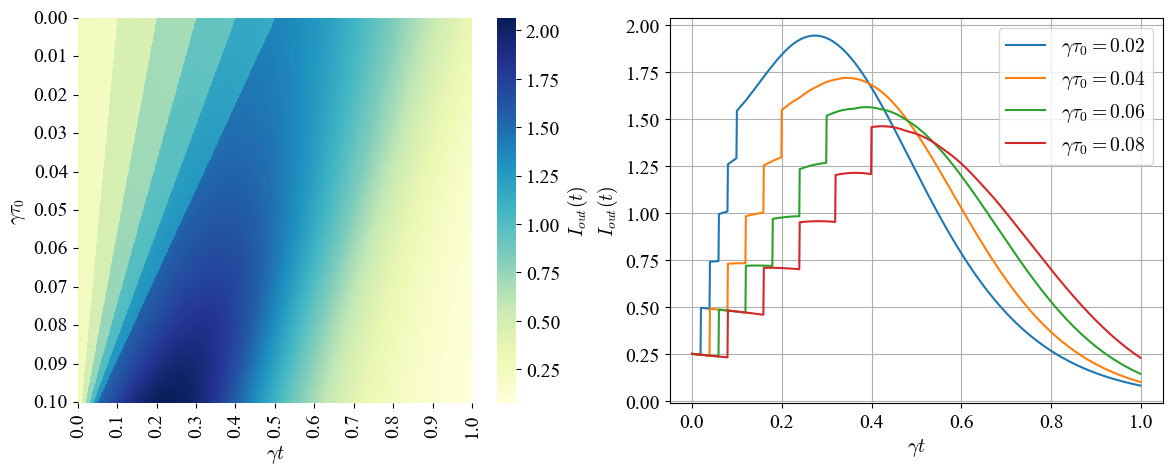

In [167]:
# plot figure 
I_map = [np.real(arr)/gamma_0 for arr in I_map_spin[:-1]]
fig, axs = plt.subplots(1,2,figsize=(14,5))

sns.heatmap(I_map, cmap="YlGnBu",ax=axs[0],cbar_kws={'label': r"$I_{out}(t)$"})


x_ticks = np.linspace(0, len(I_map[0])-1, 11)  
x_labels = [f"{x:.1f}" for x in np.linspace(0, 1, 11)]
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels)
axs[0].set_xlabel(r"$\gamma t$")  

y_ticks = np.linspace(0, len(I_map)-1, 11)  
y_labels = [f"{y:.2f}" for y in np.linspace(0, 0.1, 11)]
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(y_labels)
axs[0].set_ylabel(r"$\gamma \tau_{0}$")  

axs[1].plot(t,np.array(I_map[320][:-1]),label=rf"$\gamma \tau_{0}={tau_values[320]:.2f}$")
axs[1].plot(t,np.array(I_map[240][:-1]),label=rf"$\gamma \tau_{0}={tau_values[240]:.2f}$")
axs[1].plot(t,np.array(I_map[160][:-1]),label=rf"$\gamma \tau_{0}={tau_values[160]:.2f}$")
axs[1].plot(t,np.array(I_map[80][:-1]),label=rf"$\gamma \tau_{0}={tau_values[80]:.2f}$")
axs[1].set_ylabel(r"$I_{out}(t)$")
axs[1].set_xlabel(r"$\gamma t $")
axs[1].legend()
axs[1].grid()
plt.show()


## 3.2 Cavities  

In [ ]:
# defining sampling functions. (another method is used because I'm still learning)
dt = 0.001 

def sample_boson(tau_sample):
    Nsteps = int(np.round(tau_sample/dt))
    w = Boson_DDE_integrator(pr_check=True,gamma=gamma_0, phi=phi_0, tau=tau_sample, initial_state=initial,N_steps=Nsteps)
    w.evolve(t_evolve)
    t_boson = np.asarray(w.t_list)
    J_boson = np.asarray(w.J_list)
    J_new = change_J_format(J_boson)
    I_boson = output_current(t_boson,J_new,gamma_0,tau_sample,initial) #this formula works 
    I_max = np.max(np.real(I_boson))
    max_position = np.argmax(np.real(I_boson))
    
    return I_max, I_boson, max_position 



[Parallel(n_jobs=64)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=64)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=64)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=64)]: Done  53 tasks      | elapsed:    6.9s
[Parallel(n_jobs=64)]: Done  72 tasks      | elapsed:    7.1s
[Parallel(n_jobs=64)]: Done  93 tasks      | elapsed:    8.5s
[Parallel(n_jobs=64)]: Done 114 tasks      | elapsed:   10.6s
[Parallel(n_jobs=64)]: Done 137 tasks      | elapsed:   12.7s
[Parallel(n_jobs=64)]: Done 160 tasks      | elapsed:   13.6s
[Parallel(n_jobs=64)]: Done 185 tasks      | elapsed:   15.0s
[Parallel(n_jobs=64)]: Done 210 tasks      | elapsed:   17.6s
[Parallel(n_jobs=64)]: Done 272 out of 362 | elapsed:   21.5s remaining:    7.1s
[Parallel(n_jobs=64)]: Done 309 out of 362 | elapsed:   24.9s remaining:    4.3s
[Parallel(n_jobs=64)]: Done 346 out of 362 | elapsed:   26.7s remaining:    1.2s
[Parallel(n_jobs=64)]: Done 362 out of 362 | elapsed:   28.0

In [ ]:
# data calculation 
results = Parallel(n_jobs=64, verbose=10)(
    delayed(sample_boson)(tau_s) for tau_s in tau_values
)

I_max_list, I_boson_list, max_position_list = zip(*results)

I_max_list = list(I_max_list)
I_map_boson = list(I_boson_list)
max_position_list = list(max_position_list)

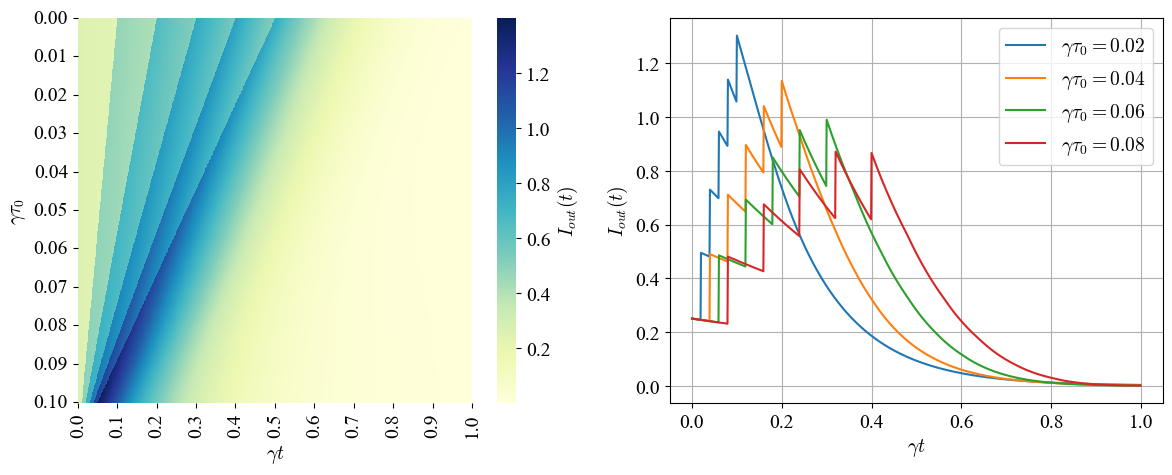

In [156]:
# plot figure 
I_map = [np.abs(arr)/gamma_0 for arr in I_map_boson[:-1]]
fig, axs = plt.subplots(1,2,figsize=(14,5))

sns.heatmap(I_map, cmap="YlGnBu",ax=axs[0],cbar_kws={'label': r"$I_{out}(t)$"})

x_ticks = np.linspace(0, len(I_map[0])-1, 11)  
x_labels = [f"{x:.1f}" for x in np.linspace(0, 1, 11)]
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_labels)
axs[0].set_xlabel(r"$\gamma t$")  

y_ticks = np.linspace(0, len(I_map)-1, 11)  
y_labels = [f"{y:.2f}" for y in np.linspace(0, 0.1, 11)]
axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(y_labels)
axs[0].set_ylabel(r"$\gamma \tau_{0}$") 


axs[1].plot(t,I_map[320][:-1],label=rf"$\gamma \tau_{0}={tau_values[320]:.2f}$")
axs[1].plot(t,I_map[240][:-1],label=rf"$\gamma \tau_{0}={tau_values[240]:.2f}$")
axs[1].plot(t,I_map[160][:-1],label=rf"$\gamma \tau_{0}={tau_values[160]:.2f}$")
axs[1].plot(t,I_map[80][:-1],label=rf"$\gamma \tau_{0}={tau_values[80]:.2f}$")
axs[1].set_xlabel(r"$\gamma t $")
axs[1].set_ylabel(r"$I_{out}(t)$")
axs[1].legend()
axs[1].grid()
plt.show()

## 3.3 max current comparison 

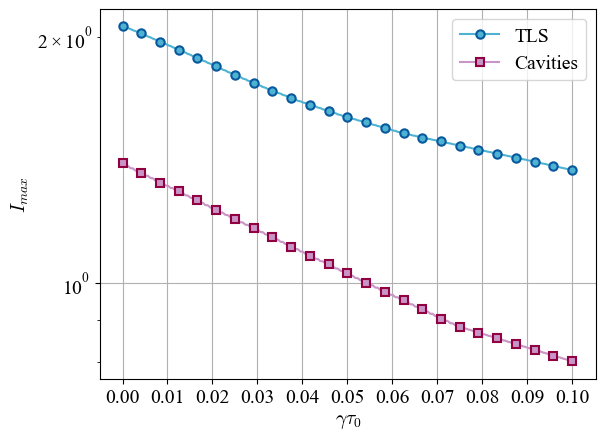

In [ ]:
# plot figure
fig,ax = plt.subplots()
ax.plot(np.asarray(I_max_spin[::-1])/gamma_0,label='TLS',**format_plot(0,15))
ax.plot(np.asarray(I_max_list[::-1])/gamma_0,label='Cavities',**format_plot(1,15))

x_ticks = np.linspace(0, len(I_map)-1, 11)  
x_labels = [f"{y:.2f}" for y in np.linspace(0, 0.1, 11)]

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)
ax.set_xlabel(r"$\gamma \tau_{0}$")  
ax.set_ylabel(r"$I_{max}$")
ax.set_yscale('log')
ax.legend()
ax.grid()

plt.show()

# 4. Scaling 

In [134]:
# defining sampling functions and parameters.  
from qutip import *
from ME_logistics import ME_solution
phi_0 = 2*np.pi 
gamma_0 = 0.1 
Delta = 7.854 
t_max = 10 


def Max_Emission_Rate( populations: np.array):
    times = populations[0]
    #P_total = np.sum(np.asarray(populations)[1:],axis=0)
    P_total = np.zeros(len(times))
    for pops in populations[1:]:
        P_total += np.abs(np.array(pops))
    return -min(np.gradient(P_total, times))


def Max_Emission_Rate_Log( populations: np.array):
    P_total = 0
    #P_total = np.sum(np.asarray(populations)[1:],axis=0)
    times = populations[0]
    for pops in populations[1:]:
        P_total += np.abs(np.array(pops))
    return -min(np.gradient(np.log(P_total), times))


phi_0_1= 2 * np.pi 
phi_0_2 = np.pi 

def sample_R(N_emitters):
    w_spin_1 = Spin_DDE_integrator(gamma=gamma_0,phi=phi_0_1,tau=phi_0_1/Delta,initial_state=N_emitters*'1',N_steps=25)
    w_spin_2 = Spin_DDE_integrator(gamma=gamma_0,phi=phi_0_2,tau=phi_0_2/Delta,initial_state=N_emitters*'1',N_steps=25)
    w_boson_1 = Boson_DDE_integrator(gamma=gamma_0,phi=phi_0_1,tau=phi_0/Delta,initial_state=N_emitters*'1',N_steps=25)
    w_boson_2 = Boson_DDE_integrator(gamma=gamma_0,phi=phi_0_2,tau=phi_0/Delta,initial_state=N_emitters*'1',N_steps=25)
    

    w_spin_1.evolve(t_max)
    #w_spin_1.evolve(3.2 * N_emitters *phi_0_1/Delta)
    pop_spin = w_spin_1.excited_state()
    data_1 = np.asarray([Max_Emission_Rate(pop_spin),Max_Emission_Rate_Log(pop_spin)])

    w_spin_2.evolve(t_max)
    #w_spin_2.evolve(3.2 * N_emitters *phi_0_2/Delta)
    pop_spin_2 = w_spin_2.excited_state()
    data_2 =  np.asarray([Max_Emission_Rate(pop_spin_2),Max_Emission_Rate_Log(pop_spin_2)])


    w_boson_1.evolve(t_max)
    #w_boson_1.evolve(3.2 * N_emitters *phi_0_1/Delta)
    pop_boson = w_boson_1.excited_state()
    data_3 =  np.asarray([Max_Emission_Rate(pop_boson),Max_Emission_Rate_Log(pop_boson)])

    w_boson_2.evolve(t_max)
    #w_boson_2.evolve(3.2 * N_emitters *phi_0_2/Delta)
    pop_boson_2 = w_boson_2.excited_state()
    data_4 =  np.asarray([Max_Emission_Rate(pop_boson_2),Max_Emission_Rate_Log(pop_boson_2)])


    return np.asarray([ data_1,data_2,data_3,data_4])

def sample_ME(N_emitters):
    rho_0= tensor([basis(2,0) for _ in range(0,N_emitters)])
    result  = ME_solution(N_emitters,np.arange(0,N_emitters)*phi_0_1,gamma_0,t_max,rho_0=rho_0)
    t_ME_1 = result[0]
    data_ME_1=result[1]
    result_2 = ME_solution(N_emitters,np.arange(0,N_emitters)*phi_0_2,gamma_0,t_max,rho_0=rho_0)
    t_ME_2 = result_2[0]
    data_ME_2=result_2[1]

    data_1 = [t_ME_1]
    data_2 = [t_ME_2]
    
    for i,_ in enumerate(data_ME_1):
        data_1.append(data_ME_1[i])
        data_2.append(data_ME_2[i])
    return np.asarray([[Max_Emission_Rate(data_1),Max_Emission_Rate_Log(data_1)],[Max_Emission_Rate(data_2),Max_Emission_Rate_Log(data_2)]])


In [ ]:
# data calculation 
data = []
data_ME = []

# disclaimer: this part is extremly slow (~ 12 mins )
N_emitters = np.arange(2,9)
for n in N_emitters:
    data.append(sample_R(n))
    data_ME.append(sample_ME(n))
    

In [ ]:
# data formatting 
dat = np.asarray(data)

R_spins = np.real(dat[:,0,0])
R_spins_log =  np.real(dat[:,0,1])

R_spins_2 =  np.real(dat[:,1,0])
R_spins_log_2 =  np.real(dat[:,1,1])

R_bosons =  np.real(dat[:,2,0])
R_bosons_log =  np.real(dat[:,2,1])


R_bosons_2 =  np.real(dat[:,3,0])
R_bosons_log_2 =  np.real(dat[:,3,1])

data_ME=np.asarray(data_ME)

data_ME_2p=data_ME[:,0,0]
data_Me_2p_log = data_ME[:,0,1]

data_ME_p=data_ME[:,1,0]
data_Me_p_log = data_ME[:,1,1]


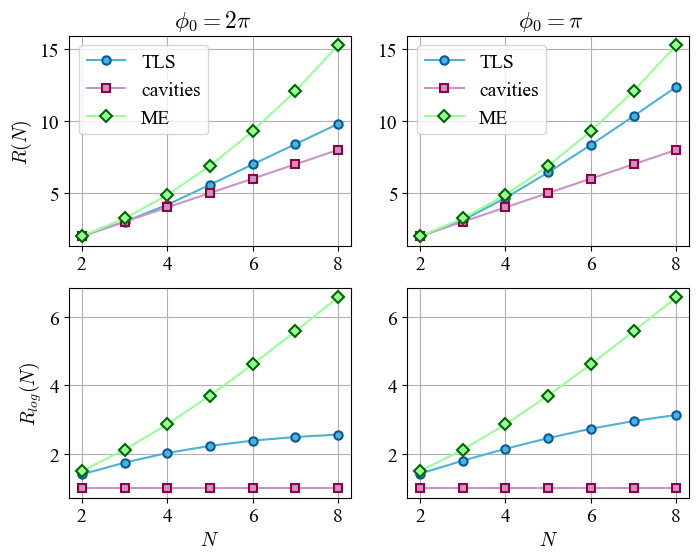

In [141]:
# figure plot 
fig,axs = plt.subplots(2,2, figsize = (8,6))

axs[0,0].plot(N_emitters,R_spins/gamma_0,label='TLS',**format_plot(0,1))
axs[0,0].plot(N_emitters,R_bosons/gamma_0,label='cavities',**format_plot(1,1))
axs[0,0].plot(N_emitters,data_ME_2p/gamma_0,label='ME',**format_plot(2,1))
axs[0,0].legend()
axs[0,0].set_ylabel(r"$R(N)$")
axs[0,0].set_title(r" $\phi_{0} = 2 \pi  $ ")
axs[0,0].grid()

axs[1,0].plot(N_emitters,R_spins_log/gamma_0,label='TLS',**format_plot(0,1))
axs[1,0].plot(N_emitters,R_bosons_log/gamma_0,label ='cavities',**format_plot(1,1))
axs[1,0].plot(N_emitters,data_Me_2p_log/gamma_0,label='ME',**format_plot(2,1))
axs[1,0].set_ylabel(r"$R_{log}(N)$")
axs[1,0].set_xlabel(r"$ N $ ")
axs[1,0].grid()


axs[0,1].plot(N_emitters,R_spins_2/gamma_0,label='TLS',**format_plot(0,1))
axs[0,1].plot(N_emitters,R_bosons_2/gamma_0,label='cavities',**format_plot(1,1))
axs[0,1].plot(N_emitters,data_ME_p/gamma_0,label='ME',**format_plot(2,1))
axs[0,1].set_title(r" $\phi_{0} = \pi  $ ")
axs[0,1].legend()
axs[0,1].grid()

axs[1,1].plot(N_emitters,R_spins_log_2/gamma_0,label='TLS',**format_plot(0,1))
axs[1,1].plot(N_emitters,R_bosons_log_2/gamma_0,label ='cavities',**format_plot(1,1))
axs[1,1].plot(N_emitters,data_Me_p_log/gamma_0,label='ME',**format_plot(2,1))
axs[1,1].set_xlabel(r"$ N $ ")
axs[1,1].grid()